In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.tsa.stattools import adfuller

from machine_learning.time_series.eda import compute_autocorrelation

In [2]:
sns.set_style("whitegrid")

figsize = (12, 8)

In [3]:
filepath = "../data/time_series/widget_sales.csv"
df = pd.read_csv(filepath)
df.describe()

,widget_sales
count,500.000000
mean,46.969858
std,15.382473
min,20.674946
25%,32.507149
50%,47.667536
75%,59.425693
max,82.922496


In [4]:
values = df.widget_sales.values

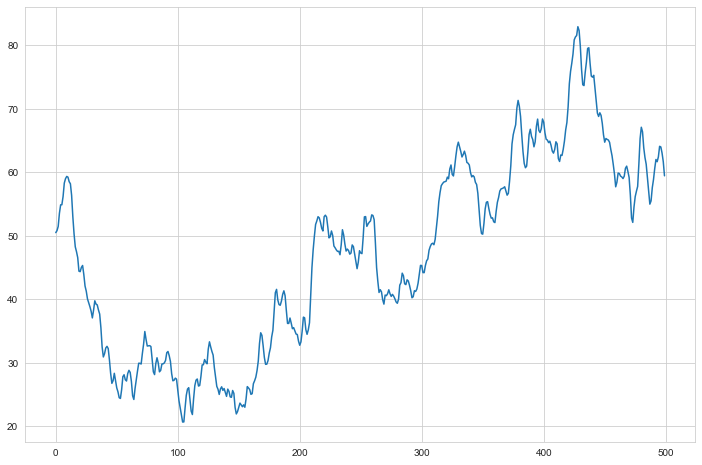

In [5]:
plt.figure(figsize=figsize)
plt.plot(values)
plt.show()

### trend and detrend

#### trend

In [6]:
adf_result = adfuller(values)
adf_result

(-1.5121662069359048,
 0.5274845352272605,
 3,
 496,
 {'1%': -3.4436029548776395,
  '5%': -2.867384756137026,
  '10%': -2.5698830308597813},
 1354.8017397952053)

In [7]:
adf_stat = adf_result[0]
adf_p_value = adf_result[1]
adf_stat, adf_p_value

(-1.5121662069359048, 0.5274845352272605)

#### detrend

In [8]:
values_diff = np.diff(values, 1)

In [9]:
adf_result_diff = adfuller(values_diff)
adf_result_diff

(-10.576657780341959,
 7.076922818587193e-19,
 2,
 496,
 {'1%': -3.4436029548776395,
  '5%': -2.867384756137026,
  '10%': -2.5698830308597813},
 1350.640860630276)

In [10]:
adf_stat_diff = adf_result_diff[0]
adf_p_value_diff = adf_result_diff[1]
adf_stat_diff, adf_p_value_diff

(-10.576657780341959, 7.076922818587193e-19)

### autocorrelation and lag

In [11]:
n_lags = 30
correlations = [compute_autocorrelation(values_diff, i) for i in range(n_lags + 1)]

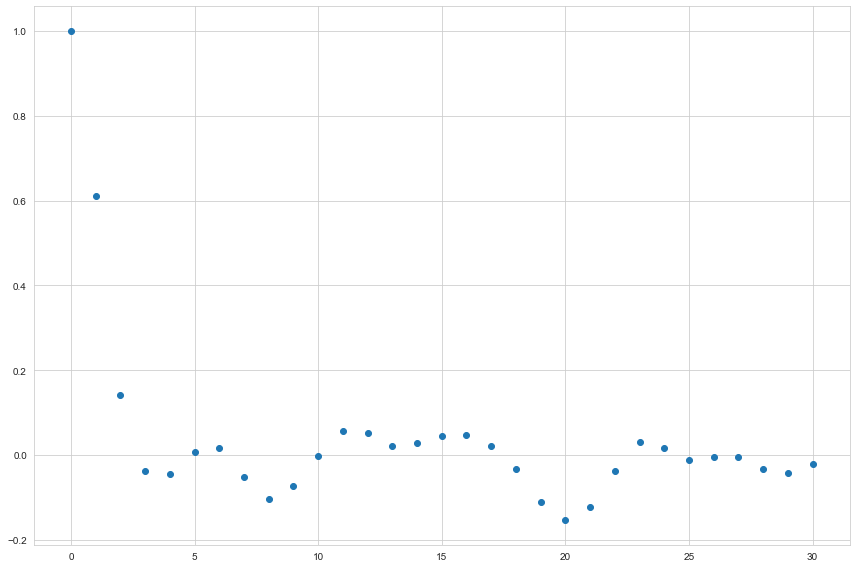

In [15]:
plt.figure(figsize=figsize)
plt.scatter(range(n_lags + 1), correlations)
plt.tight_layout()
plt.show()

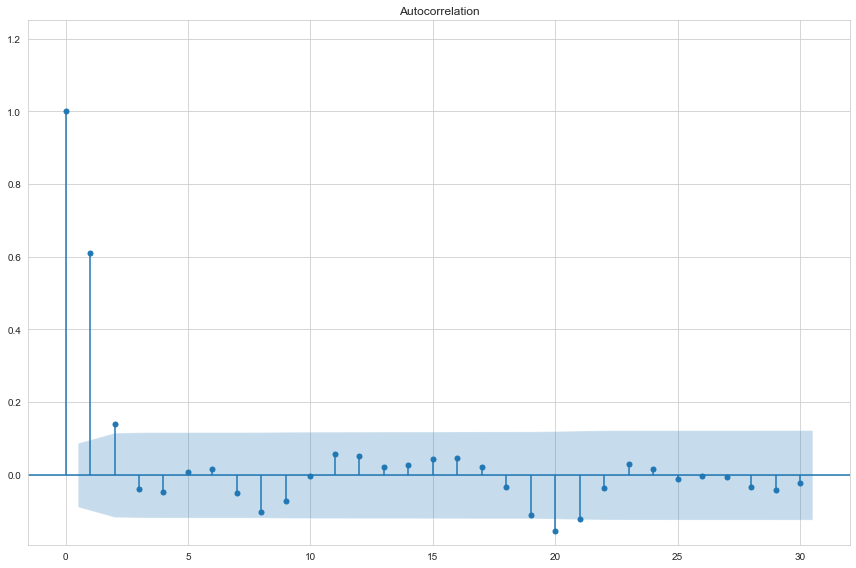

In [16]:
plt.rc("figure", figsize=figsize)
plot_acf(values_diff, lags=30, auto_ylims=True)
plt.tight_layout()

### seasonality

In [17]:
# todo: compute some metrics, use Kats to decompose